# Notebook de Análise do Lote Inicial

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Definindo um Chunk do arquivo para Análise

In [2]:
# Definindo o tamanho do chunk para x linhas (alterar abaixo para mudar o tamanho do chunk)
chunksize = 2000

# Lista para armazenar os chunks processados
chunks = []

reader = pd.read_csv('LoteInicial.csv', chunksize=chunksize)
chunks.append(reader)

# Pegando o primeiro chunk
chunk = next(reader)

# Exibindo o chunk
print(chunk)

              ISIN Fund Group Name Dynamic Currency General Reference Date  \
0     LU1883342021          Amundi              GBP             2022-07-17   
1     LU1883342021          Amundi              GBP             2022-07-17   
2     LU1883342021          Amundi              GBP             2022-07-17   
3     LU1883342021          Amundi              GBP             2022-07-17   
4     LU1883342021          Amundi              GBP             2022-07-17   
...            ...             ...              ...                    ...   
1995  LU1883342021          Amundi              GBP             2015-01-30   
1996  LU1883342021          Amundi              GBP             2015-01-30   
1997  LU1883342021          Amundi              GBP             2015-01-30   
1998  LU1883342021          Amundi              GBP             2015-02-02   
1999  LU1883342021          Amundi              GBP             2015-02-02   

                Dynamic Data Type  Dynamic Value  
0           

## Análise do Chunk Selecionado do Lote Inicial

In [3]:
print(chunk['ISIN'].unique())
print(chunk['Fund Group Name'].unique())
print(chunk['Dynamic Data Type'].unique())

['LU1883342021']
['Amundi']
['FE Bid' 'FE Total Return Bid' 'FE Gross Total Return Bid' 'FE Offer'
 'FE Total Return Offer' 'FE Gross Total Return Offer']


In [4]:
print(chunk['Dynamic Value'].describe())

count    2000.00000
mean       59.68829
std        10.27266
min        38.43000
25%        62.55250
50%        64.22000
75%        66.26000
max        69.61000
Name: Dynamic Value, dtype: float64


In [5]:
chunk['General Reference Date'] = pd.to_datetime(chunk['General Reference Date'])

In [6]:
print(chunk.groupby('General Reference Date')['Dynamic Value'].mean())

General Reference Date
2014-10-10    39.39
2014-10-13    39.24
2014-10-14    39.45
2014-10-15    38.81
2014-10-16    38.43
              ...  
2023-07-11    63.52
2023-07-12    63.58
2023-07-13    63.56
2023-07-14    63.68
2023-07-17    63.77
Name: Dynamic Value, Length: 334, dtype: float64


In [7]:
frequencias = chunk.groupby(['ISIN', 'Dynamic Data Type']).size()
print(frequencias)

ISIN          Dynamic Data Type          
LU1883342021  FE Bid                         334
              FE Gross Total Return Bid      333
              FE Gross Total Return Offer    333
              FE Offer                       333
              FE Total Return Bid            334
              FE Total Return Offer          333
dtype: int64


### Plota a Média dos Valores de Dynamic Value ao longo do tempo para uma Dynamic Data Type

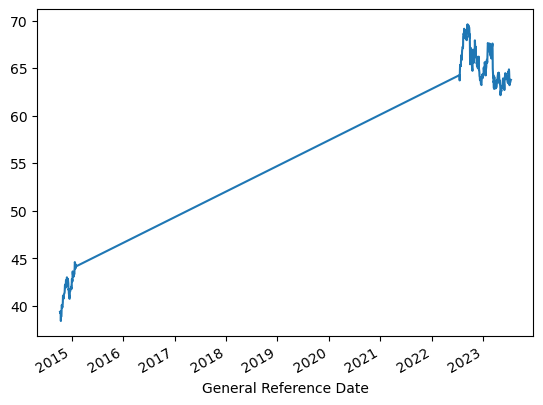

In [8]:
chunk['General Reference Date'] = pd.to_datetime(chunk['General Reference Date'])
    
# Filtrar por 'FE Bid' e calcular média por data
fe_bid = chunk[chunk['Dynamic Data Type'] == 'FE Bid']
media_por_data = fe_bid.groupby('General Reference Date')['Dynamic Value'].mean()
    
# Plotar a média ao longo do tempo
media_por_data.plot()
plt.show()

In [9]:
media_por_grupo = chunk.groupby('Fund Group Name')['Dynamic Value'].mean()
print(media_por_grupo)

Fund Group Name
Amundi    59.68829
Name: Dynamic Value, dtype: float64
